# FastText

In [ ]:
!pip install PySastrawi

     |████████████████████████████████| 215kB 8.4MB/s 


In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 4.5MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3096488 sha256=f1db527460a175cde540d58a83be2bf0d1ec2df386171baa4341fbc1d96017a9
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz

--2021-05-08 23:58:46--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4507049071 (4.2G) [application/octet-stream]
Saving to: ‘cc.id.300.bin.gz’

cc.id.300.bin.gz    100%[===================>]   4.20G  51.4MB/s    in 84s     

2021-05-09 00:00:10 (51.2 MB/s) - ‘cc.id.300.bin.gz’ saved [4507049071/4507049071]



In [ ]:
!gunzip cc.id.300.bin.gz

In [ ]:
# step 1 - stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

sentence = 'Ass pak,,saya mau tanya jika seorang anak dtahan oleh bapaknya...dan tidak boleh bertemu dengan ibu nya... apa yang harus saya lakukan...saya sdh bicara baik2 dgn mantan suami saya... mohon sarannya terimakasih'
output_stem   = stemmer.stem(sentence)

print(output_stem)

ass pak saya mau tanya jika orang anak dtahan oleh bapak dan tidak boleh temu dengan ibu nya apa yang harus saya laku saya sdh bicara baik2 dgn mantan suami saya mohon saran terimakasih


In [ ]:
# step 2 - remove stop word & tokenize

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
output_stopwordremoved = stopword.remove(output_stem)
output_token = nltk.tokenize.word_tokenize(output_stopwordremoved)
print(output_token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['ass', 'anak', 'dtahan', 'temu', 'sdh', 'bicara', 'baik2', 'dgn', 'mantan', 'suami', 'saran', 'terimakasih']


In [ ]:
# step 3 - vectorize

import fasttext

model = fasttext.load_model("cc.id.300.bin")

for i in output_token:
  print('The vector of word {} is {} \n \n'.format(i, model[i]))

The vector of word ass is [ 8.80907476e-02  3.17557417e-02  1.21719670e-02 -8.42830464e-02
 -1.43240821e-02  9.20897946e-02  9.01683941e-02  1.14310436e-01
  1.80601463e-01 -2.41307616e-02 -3.83066162e-02  8.96381438e-02
  7.91572481e-02  1.47737831e-01 -1.38649866e-01 -1.27829716e-01
 -2.92995777e-02  1.60466135e-01 -1.61451146e-01  1.14374071e-01
 -7.95074850e-02 -8.35267380e-02 -1.61519628e-02 -1.93460152e-01
 -2.01510191e-01 -2.78504007e-02 -6.95109591e-02 -1.19584881e-01
 -9.42851603e-02  3.81834395e-02 -4.03484851e-02  3.04525439e-02
 -1.22284524e-01  7.99141638e-03 -4.37111221e-02  7.39776157e-03
  7.50823393e-02  6.78003132e-02  7.94992000e-02  2.90384702e-02
 -6.21190574e-03  7.39689395e-02  6.46714270e-02  4.07305285e-02
 -2.20952064e-01 -6.08962588e-02 -1.33563682e-01 -1.03997551e-01
  1.21809289e-01  3.01540885e-02 -1.73372135e-01 -8.01222324e-02
 -1.02392040e-01  1.20919056e-01  7.31596947e-02 -7.50856772e-02
 -1.99016631e-01  1.03791140e-01 -1.10355377e-01 -4.01893258e-02

In [ ]:
print(model['terimakasih'].shape)

(300,)


# Fafa

## **Langkah 1**: Install dependency & import Dataset

In [ ]:
!pip install PySastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
#Datasetnya download yang baru di google spreadsheet, sudah aku update tadi dibenerin kolom2nya dikit
import pandas as pd
df = pd.read_csv('Sapa.AI Own Dataset - Sheet1.csv')
df.head()

,Text,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial
0,"selamat sore , saya adalah ibu dari satu anak ...",1,1,0,0,0,0,0,0
1,Mohon bantu pak saya sedang hamil pak diluar n...,0,0,0,0,0,0,1,0
2,Saya seorang anak perempuan yang bersuami teta...,1,0,0,0,0,0,0,0
3,Jika anak perempuan tidak di beri nafkah orang...,0,0,0,0,0,1,1,0
4,Pak saya status pernikahan sudah setahun pisah...,1,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Text                  41 non-null     object
 1   Layanan Hukum         41 non-null     int64 
 2   Layanan Medis         41 non-null     int64 
 3   Layanan Psikologis    41 non-null     int64 
 4   Rehabilitasi Sosial   41 non-null     int64 
 5   Jaminan Keselamatan   41 non-null     int64 
 6   Layanan Pendidikan    41 non-null     int64 
 7   Pengasuhan Pengganti  41 non-null     int64 
 8   Bantuan Sosial        41 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


## **Langkah 2**: Preprocess Feature (Teks Pengaduan)

**Langkah 2.1**: Stem dengan Sastrawi untuk mengubah bentuk kata ke bentuk dasar, hapus angka, hapus simbol, hapus whitespace. Lalu remove stop word untuk menghilangkan kata yang kurang bermakna di dalam suatu kalimat.

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

x = []
for i in df['Text']:
  stemmed_sentence = stemmer.stem(str(i))
  stop_word_removed = stopword.remove(stemmed_sentence)
  output_token = nltk.tokenize.word_tokenize(stop_word_removed)
  x.append(output_token)

x[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['selamat',
 'sore',
 'anak',
 'janda',
 'mantan',
 'suami',
 'aniaya',
 'tolong',
 'bantuanya']

**Langkah 2.2**: Padding kalimat pada dataset dengan whitespace agar masing-masing vektor kalimat memiliki jumlah kata yang sama.

In [ ]:
max_len = 0

for sentence in x:
  if len(sentence) > max_len:
    max_len = len(sentence)

for sentence in x:
  sentence += [''] * (max_len - len(sentence))

x

[['selamat',
  'sore',
  'anak',
  'janda',
  'mantan',
  'suami',
  'aniaya',
  'tolong',
  'bantuanya',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['bantu',
  'hamil',
  'nikah',
  'anak',
  'kembar',
  'pacar',
  'tanggung',
  'anak',
  'hindar',
  'gak',
  'tau',
  'keluarga',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['anak',
  'perempuan',
  'suam',
  'tua',
  'campur',
  'ayah',
  'ancam',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['anak',
  'perempuan',
  'nafkah',
  'tua',
  'ayah',
  'anak',
  'sekolah',
  'tolong',
  'makasih',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['status',
  'nikah',
  'tah

**Langkah 2.3**: Ubah semua kata pada dataset ke dalam bentuk embedding dengan menggunakan Neural Network Language Model dari TFHub untuk bahasa Indonesia dengan 50 dimensi embedding dan nilainya dinormalisasi. Output neural network berdimensi (42, 32, 50) yang bermakna bahwa data kita terdiri atas 42 kalimat yang masing-masing terdiri atas 32 kata yang masing-masing dinyatakan dengan 50 dimensi embedding.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2")

@tf.function
def embedding(sentence_list):
  embedded_sentences = []
  for sentence in sentence_list:
    sentence_tensor = []
    for word in sentence:
      data_tensor = tf.convert_to_tensor(word, dtype=tf.string)
      sentence_tensor.append(data_tensor)
    embeddings = embed(sentence_tensor)
    embedded_sentences.append(embeddings)
  return embedded_sentences

x = embedding(x)
tf.shape(x)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([41, 32, 50], dtype=int32)>

In [ ]:
import numpy as np

x = np.array(x)
type(x)

numpy.ndarray

In [ ]:
x.shape

(41, 32)

## **Langkah 3**: Preprocess Label (Kelas Pengaduan)

In [ ]:
y = []
for i in df.index:
  a = []
  a.append(int(df['Layanan Hukum'][i]))
  a.append(int(df['Layanan Medis'][i]))
  a.append(int(df['Layanan Psikologis'][i]))
  a.append(int(df['Rehabilitasi Sosial'][i]))
  a.append(int(df['Jaminan Keselamatan'][i]))
  a.append(int(df['Layanan Pendidikan'][i]))
  a.append(int(df['Pengasuhan Pengganti'][i]))
  a.append(int(df['Bantuan Sosial'][i].astype(int)))
  y.append(a)
tf.shape(y)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([41,  8], dtype=int32)>

In [ ]:
import numpy as np
y = np.array(y)
y

array([[1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1,

In [ ]:
train_data_feature = x[:35]
train_data_label = y[:35]
test_data_feature= x[35:]
test_data_label = y[35:]


## **Langkah 4**: Neural Network Hyperparameter Tuning

In [ ]:
embed = hub.load("https://tfhub.dev/google/nnlm-id-dim50-with-normalization/2")
hub_layer = hub.KerasLayer(embed, input_shape=[], dtype=tf.string, trainable=False)

In [ ]:
model = tf.keras.Sequential([
                             hub_layer,
                             tf.keras.layers.Conv1D(64, 5, activation='relu'),
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])
model.summary()

ValueError: ignored

In [ ]:
from tensorflow import keras
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(train_data_feature, train_data_label,
                    epochs=100,
                    validation_data = (test_data_feature, test_data_label))
plt.plot(history.history['accuracy'])

#Icha

In [ ]:
import pandas as pd

data = pd.read_csv("/content/Sapa.AI Own Dataset - Sheet1.csv")

In [ ]:
data.tail()

,Text,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial
36,Saya seorang ibu yang tidak pernah menikah sec...,1,0,0,0,0,0,0,0.0
37,saya istri PNS sudah menikah tiga puluh delapa...,1,0,0,0,0,0,0,0.0
38,Adik saya dan suaminya sering bertengkar terus...,1,0,0,0,0,0,0,0.0
39,"Saya bekerja sebagai kuli proyek, kemarin saya...",1,0,0,0,1,0,0,NaN
40,"Tolong saya, saya kecanduan narkoba sudah lebi...",0,0,0,1,0,0,0,0.0


In [ ]:
def preprocessing_text(text) :
  factory_ = StemmerFactory()
  stemmer = factory_.create_stemmer()
  stemmed_sentence = stemmer.stem(text)
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  stop_word_removed = stopword.remove(stemmed_sentence)
  final_token = nltk.tokenize.word_tokenize(stop_word_removed)
  return final_token


In [ ]:
data["text_preprocess"] = data['Text'].apply(preprocessing_text)

In [ ]:
data.head()

,Text,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial,text_preprocess
0,"selamat sore , saya adalah ibu dari satu anak ...",1,1,0,0,0,0,0,0.0,"[selamat, sore, anak, janda, mantan, suami, an..."
1,Mohon bantu pak saya sedang hamil pak diluar n...,0,0,0,0,0,0,1,0.0,"[bantu, hamil, nikah, anak, kembar, pacar, tan..."
2,Saya seorang anak perempuan yang bersuami teta...,1,0,0,0,0,0,0,0.0,"[anak, perempuan, suam, tua, campur, ayah, ancam]"
3,Jika anak perempuan tidak di beri nafkah orang...,0,0,0,0,0,1,1,0.0,"[anak, perempuan, nafkah, tua, ayah, anak, sek..."
4,Pak saya status pernikahan sudah setahun pisah...,1,1,0,0,0,0,0,0.0,"[status, nikah, tahun, pisah, ranjang, nikah, ..."


In [ ]:
data = data.drop(columns = "Text")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Layanan Hukum         41 non-null     int64  
 1   Layanan Medis         41 non-null     int64  
 2   Layanan Psikologis    41 non-null     int64  
 3   Rehabilitasi Sosial   41 non-null     int64  
 4   Jaminan Keselamatan   41 non-null     int64  
 5   Layanan Pendidikan    41 non-null     int64  
 6   Pengasuhan Pengganti  41 non-null     int64  
 7   Bantuan Sosial        40 non-null     float64
 8   text_preprocess       41 non-null     object 
dtypes: float64(1), int64(7), object(1)
memory usage: 3.0+ KB


In [ ]:
data.head()

,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial,text_preprocess
0,1,1,0,0,0,0,0,0.0,"[selamat, sore, anak, janda, mantan, suami, an..."
1,0,0,0,0,0,0,1,0.0,"[bantu, hamil, nikah, anak, kembar, pacar, tan..."
2,1,0,0,0,0,0,0,0.0,"[anak, perempuan, suam, tua, campur, ayah, ancam]"
3,0,0,0,0,0,1,1,0.0,"[anak, perempuan, nafkah, tua, ayah, anak, sek..."
4,1,1,0,0,0,0,0,0.0,"[status, nikah, tahun, pisah, ranjang, nikah, ..."


In [ ]:
max_len = 0


for text in data["text_preprocess"] :
  if len(text) > max_len :
    max_len = len(text)


for text in data["text_preprocess"] :
  text += [' '] * (max_len - len(text))

In [ ]:
data.text_preprocess

0     [selamat, sore, anak, janda, mantan, suami, an...
1     [bantu, hamil, nikah, anak, kembar, pacar, tan...
2     [anak, perempuan, suam, tua, campur, ayah, anc...
3     [anak, perempuan, nafkah, tua, ayah, anak, sek...
4     [status, nikah, tahun, pisah, ranjang, nikah, ...
5     [ayah, larang, anak, temu, larang, rawat, anak...
6     [cerai, tujuh, tahun, ngga, nafkah, anak, bant...
7     [anak, telantar, rantau, tahun, suami, bawa, i...
8     [lindung, perempuan, suami, siksa, istri, sama...
9     [tolong, lindung, cemar, nama, anak, ancam, ed...
10    [bukti, suami, papah, anak, binatang, pakai, b...
11    [assalamualaikum, anak, tahan, temu, bicara, m...
12    [selamat, sore, perempuan, umur, puluh, tahun,...
13    [selamat, sore, tolong, bantu, peras, mantan, ...
14    [bantu, yg, nyebar, foto, seksi, gimana, lapor...
15    [saran, adik, perempuan, siksa, dipukulin, kak...
16    [siang, anak, umur, cerai, suami, suami, suka,...
17    [bully, teman, kelas, tahun, lapor, saran,

In [ ]:
text_clean = data["text_preprocess"].values
label_clean = data.drop(columns = "text_preprocess").values

In [ ]:
from sklearn.model_selection import train_test_split
text_clean_latih, text_clean_test, label_clean_latih, label_clean_test = train_test_split(text_clean, label_clean, test_size=0.1)

In [ ]:
def embedding(sentence_list):
  embedded_sentences = []
  for sentence in sentence_list:
    sentence_tensor = []
    for word in sentence:
      data_tensor = tf.convert_to_tensor(word, dtype=tf.string)
  return data_tensor

In [ ]:
text_clean_latih = embedding(text_clean_latih)

In [ ]:
text_clean_test = embedding(text_clean_test)

In [ ]:
label_clean_test = np.array(label_clean_test)
label_clean_latih = np.array(label_clean_latih)

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential([
        hub_layer,
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(text_clean_latih, label_clean_latih,
                    epochs=20,
                    validation_data = (text_clean_test, label_clean_test))

IndexError: ignored

# Coba Pake Cara Tensorflow Biasa

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Sapa.AI Own Dataset - Sheet1.csv")

In [ ]:
df.head()

,Text,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial
0,"selamat sore , saya adalah ibu dari satu anak ...",1,1,0,0,0,0,0,0
1,Mohon bantu pak saya sedang hamil pak diluar n...,0,0,0,0,0,0,1,0
2,Saya seorang anak perempuan yang bersuami teta...,1,0,0,0,0,0,0,0
3,Jika anak perempuan tidak di beri nafkah orang...,0,0,0,0,0,1,1,0
4,Pak saya status pernikahan sudah setahun pisah...,1,1,0,0,0,0,0,0


In [ ]:
text = df["Text"].values
label = df.drop(columns = "Text").values

In [ ]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.3)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: nan - accuracy: 0.0312 - val_loss: nan - val_accuracy: 0.8889
Epoch 2/50
1/1 [==============================] - 0s 86ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 3/50
1/1 [==============================] - 0s 76ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 4/50
1/1 [==============================] - 0s 84ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 5/50
1/1 [==============================] - 0s 82ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 6/50
1/1 [==============================] - 0s 84ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 7/50
1/1 [==============================] - 0s 87ms/step - loss: nan - accuracy: 0.7188 - val_loss: nan - val_accuracy: 0.8889
Epoch 8/50
1/1 [==============================] - 0s 88ms/step - loss: 

# Dari Notebook Yang Satu Lagi (+ Edits)

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow==2.3.0
!pip install tensorflow-addons

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_addons as tfa
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Sapa.AI Own Dataset - Sheet1.csv")

In [ ]:
data.head()

,Text,Layanan Hukum,Layanan Medis,Layanan Psikologis,Rehabilitasi Sosial,Jaminan Keselamatan,Layanan Pendidikan,Pengasuhan Pengganti,Bantuan Sosial
0,"selamat sore , saya adalah ibu dari satu anak ...",1,1,0,0,0,0,0,0
1,Mohon bantu pak saya sedang hamil pak diluar n...,0,0,0,0,0,0,1,0
2,Saya seorang anak perempuan yang bersuami teta...,1,0,0,0,0,0,0,0
3,Jika anak perempuan tidak di beri nafkah orang...,0,0,0,0,0,1,1,0
4,Pak saya status pernikahan sudah setahun pisah...,1,1,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Text                  41 non-null     object
 1   Layanan Hukum         41 non-null     int64 
 2   Layanan Medis         41 non-null     int64 
 3   Layanan Psikologis    41 non-null     int64 
 4   Rehabilitasi Sosial   41 non-null     int64 
 5   Jaminan Keselamatan   41 non-null     int64 
 6   Layanan Pendidikan    41 non-null     int64 
 7   Pengasuhan Pengganti  41 non-null     int64 
 8   Bantuan Sosial        41 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


In [ ]:
features = data["Text"]
label = data.drop(columns = "Text")

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.3)

In [ ]:
encoder = hub.load("https://tfhub.dev/google/nnlm-id-dim128-with-normalization/2")

#coba encoder
encoder(["Hello World"])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 2.36742683e-02,  6.35085702e-02, -1.15481585e-01,
        -1.45702913e-01,  1.04301488e-02, -1.74822628e-01,
        -9.14966688e-02, -1.10140834e-02, -3.11713554e-02,
         4.42826338e-02, -1.18015938e-01,  1.65684000e-01,
         3.28270644e-02, -1.65709965e-02, -2.08926260e-01,
        -6.39974847e-02,  1.11344308e-02, -1.77620471e-01,
         9.67197642e-02,  5.14155701e-02, -2.61958130e-02,
         4.59473617e-02, -9.79337990e-02,  1.42703667e-01,
         8.68656021e-03,  6.42589107e-02, -4.82872576e-02,
         5.63185662e-02, -1.99931618e-02, -1.77717619e-02,
        -5.69315739e-02, -8.88189152e-02,  1.71472654e-02,
        -2.29171421e-02,  3.65193412e-02,  1.13376379e-01,
        -1.44323051e-01, -6.15268312e-02,  6.47685379e-02,
         1.04529031e-01,  9.77970511e-02, -1.58518061e-01,
         1.21136703e-01, -4.98565286e-02,  7.84816220e-02,
         8.32099691e-02,  5.00144213e-02, -3.16916895e-03,
      

In [ ]:
model = tf.keras.models.Sequential([
                                    hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim128-with-normalization/2",
                                                   input_shape = [],
                                                   dtype = tf.string,
                                                   trainable = False),
                                    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(8, activation='softmax')
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=8, threshold=0.09)])

In [ ]:
history = model.fit(x_train, y_train,
          epochs = 500,
          validation_data = (x_test, y_test))

Epoch 1/500
1/1 [==============================] - 0s 231ms/step - loss: 2.7843 - f1_score: 0.2706 - val_loss: 2.6258 - val_f1_score: 0.2146
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 2.6780 - f1_score: 0.2706 - val_loss: 2.5223 - val_f1_score: 0.2146
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 2.5752 - f1_score: 0.2706 - val_loss: 2.4225 - val_f1_score: 0.2146
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 2.4782 - f1_score: 0.2642 - val_loss: 2.3262 - val_f1_score: 0.2146
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 2.3853 - f1_score: 0.2779 - val_loss: 2.2335 - val_f1_score: 0.2021
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 2.2929 - f1_score: 0.2932 - val_loss: 2.1441 - val_f1_score: 0.2125
Epoch 7/500
1/1 [==============================] - 0s 26ms/step - loss: 2.2063 - f1_score: 0.2636 - val_loss: 2.0583 - val_f1_score: 0.1813
Epoch 8/500
1/1 [==

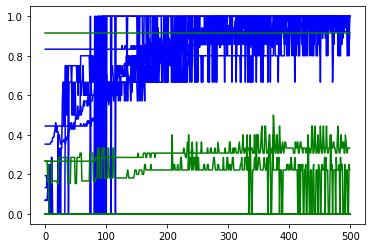

In [ ]:
plt.plot(history.history['f1_score'], color='blue')
plt.plot(history.history['val_f1_score'], color='green')

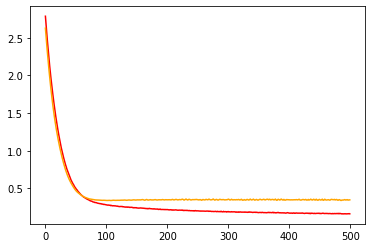

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='orange')

In [ ]:
import numpy as np

def test_case(sentence):
  predictions = []
  for i in model.predict([sentence]):
    for j in i:
      if j >= 0.1:
        predictions.append(np.where(i==j))
  return print(predictions)

test_case("Saya terkena bully disekolah, saya sangat takut")

[(array([0]),)]


In [ ]:
test_case("saya di pukul suami saya sampai berdarah")

[(array([0]),), (array([1]),)]


In [ ]:
test_case("saya tidak mampu menafkahi anak saya saya bekerja seorang diri")

[(array([0]),)]


In [ ]:
model.save('my_model.h5')

* Layanan Hukum (0)
* Layanan Medis (1)
* Layanan Psikologis (2)
* Rehabilitasi Sosial (3)
* Jaminan Keselamatan (4)
* Layanan Pendidikan (5)
* Pengasuhan Pengganti (6)
* Bantuan Sosial (7)

In [ ]:
import tempfile
import os

MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 144
drwxr-xr-x 2 root root   4096 May 12 03:16 assets
-rw-r--r-- 1 root root 138536 May 12 03:16 saved_model.pb
drwxr-xr-x 2 root root   4096 May 12 03:16 variables
